# DB에서 필요한 정보 추출

In [ ]:
#  1. aws 정보 
#    2. detection 코드
#      3. DB연결
#         4. date, gps, 사진(aws)저장 => 사진 url은 따로 저장해둠
#    5. 다시 다음장 detection

# 객체에 id 부여해서 검출 및 bbox 가 가장클 때 저장

In [1]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

In [4]:
# source=0 으로 두면 웹캠으로 진행됨
video_path = '/Users/juhyeon/python-workspace/ROADs/driving.mp4'

results = model.track(source=video_path, show=True, tracker='bytetrack.yaml')

# 각 프레임에 대한 bounding box 정보 출력
for frame_idx, frame_result in enumerate(results_list):
    print(f"Frame {frame_idx + 1} Bounding Boxes:")
    for bbox in frame_result.xyxy:
        print(f"  Class: {bbox[5]}, Confidence: {bbox[4]}, Coordinates: {bbox[:4]}")



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/1499) /Users/juhyeon/python-workspace/ROADs/driving.mp4: 480x640 4 persons, 1 car, 55.6ms
video 1/1 (2/1499) /Users/juhyeon/python-workspace/ROADs/driving.mp4: 480x640 4 persons, 1 car, 51.7ms
video 1/1 (3/1499) /Users/juhyeon/python-workspace/ROADs/driving.mp4: 480x640 4 persons, 1 car, 52.5ms
video 1/1 (4/1499) /Users/juhyeon/python-workspace/ROADs/driving.mp4: 480x640 4 persons, 1 car, 47.6ms
video 1/1 (5/1499) /Users/juhyeon/python-wor

AttributeError: 'list' object has no attribute 'xyxy'

In [21]:
def save_frames_from_video(video_path, save_path, frame_interval=10):
    cap = cv2.VideoCapture(video_path)
    
    count = 0  
    img_count = 1  # filename

    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break

        if count % frame_interval == 0:
            img_path = os.path.join(save_path, f"frame_{img_count}.jpg")
            cv2.imwrite(img_path, cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            img_count += 1

        count += 1

    cap.release()


video_path = '/Users/juhyeon/python-workspace/ROADs/driving.mp4'
save_path = '/Users/juhyeon/python-workspace/ROADs/frame_img'
frame_interval = 10  # 10frame에 1번 저장

save_frames_from_video(video_path, save_path, frame_interval)

In [2]:
import os

image_folder_path = '/Users/juhyeon/python-workspace/ROADs/img'
test_paths = []

for filename in sorted(os.listdir(image_folder_path), key=lambda x: int(x.split("_")[1].split(".")[0])):
    if filename.endswith(".jpg") and filename.startswith("frame_"):
        file_path = os.path.join(image_folder_path, filename)
        test_paths.append(file_path)

In [38]:
test_paths

['/Users/juhyeon/python-workspace/ROADs/img/frame_1.jpg',
 '/Users/juhyeon/python-workspace/ROADs/img/frame_2.jpg',
 '/Users/juhyeon/python-workspace/ROADs/img/frame_3.jpg',
 '/Users/juhyeon/python-workspace/ROADs/img/frame_4.jpg',
 '/Users/juhyeon/python-workspace/ROADs/img/frame_5.jpg',
 '/Users/juhyeon/python-workspace/ROADs/img/frame_6.jpg',
 '/Users/juhyeon/python-workspace/ROADs/img/frame_7.jpg',
 '/Users/juhyeon/python-workspace/ROADs/img/frame_8.jpg',
 '/Users/juhyeon/python-workspace/ROADs/img/frame_9.jpg',
 '/Users/juhyeon/python-workspace/ROADs/img/frame_10.jpg',
 '/Users/juhyeon/python-workspace/ROADs/img/frame_11.jpg',
 '/Users/juhyeon/python-workspace/ROADs/img/frame_12.jpg',
 '/Users/juhyeon/python-workspace/ROADs/img/frame_13.jpg',
 '/Users/juhyeon/python-workspace/ROADs/img/frame_14.jpg',
 '/Users/juhyeon/python-workspace/ROADs/img/frame_15.jpg',
 '/Users/juhyeon/python-workspace/ROADs/img/frame_16.jpg',
 '/Users/juhyeon/python-workspace/ROADs/img/frame_17.jpg',
 '/Use

# image 1장을 확인

In [4]:
import numpy as np
import cv2
import shutil
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

from IPython import display
from PIL import Image

In [5]:
# variables to convert label/id to id/label
label2id = {"car": 0, "minivan": 1, "bicycle": 2, "road": 3, "cup": 4, "bus": 5, 
            "ca": 6, "miniva": 7, "bicycl": 8, "roa": 9, "cu": 10, "bu": 11, 
            "c": 12, "minivandf": 13, "bicyscle": 14, "roads": 15, "cudp": 16, "buqs": 17,
            "cars": 18, "minivefan": 19, "bicyclefe": 20, "roadfd": 21, "cusfp": 22, "buvs": 23}
id2label = {v: k for k, v in label2id.items()}

In [6]:
img = cv2.cvtColor(cv2.imread('/Users/juhyeon/python-workspace/ROADs/bus.jpg'), cv2.COLOR_BGR2RGB)
IMGSZ = 640

# verbose=False is set to disable logging results
results = model(img, imgsz=IMGSZ, verbose=False)[0]

# draw results
for box in results.boxes.data:
    box = box.cpu()
    bbox = box[:4].numpy().astype(np.int32)
    conf, cls_id = box[4].item(), int(box[5].item())
    cls = id2label[cls_id]
    
    text = f"{cls} {round(conf, 2)}"
    img = cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (36, 255, 12), 3)
    cv2.putText(img, text, (bbox[0], bbox[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 6)

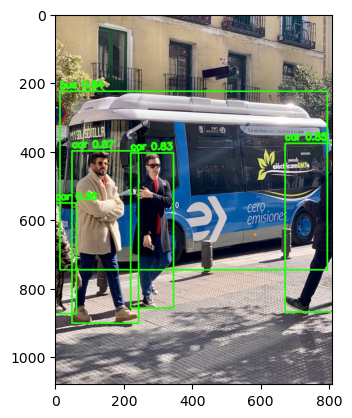

In [7]:
plt.imshow(img)

In [8]:
# View results
for r in results:
    print(r.boxes)  # print the Boxes object containing the detection bounding boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.8656])
data: tensor([[4.9091e+01, 3.9977e+02, 2.4321e+02, 9.0216e+02, 8.6562e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (1080, 810)
shape: torch.Size([1, 6])
xywh: tensor([[146.1484, 650.9639, 194.1153, 502.3853]])
xywhn: tensor([[0.1804, 0.6027, 0.2396, 0.4652]])
xyxy: tensor([[ 49.0908, 399.7713, 243.2060, 902.1566]])
xyxyn: tensor([[0.0606, 0.3702, 0.3003, 0.8353]])
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.8455])
data: tensor([[6.7079e+02, 3.7739e+02, 8.0990e+02, 8.6941e+02, 8.4552e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (1080, 810)
shape: torch.Size([1, 6])
xywh: tensor([[740.3439, 623.4028, 139.1139, 492.0210]])
xywhn: tensor([[0.9140, 0.5772, 0.1717, 0.4556]])
xyxy: tensor([[670.7869, 377.3923, 809.9008, 869.4133]])
xyxyn: tensor([[0.8281, 0.3494, 0.9999, 0.8050]])
ultralytics.engine.results.Boxes object with a

In [16]:
# bbox가 5개 존재하므로, results[0] ~ results[4]까지 존재!
print(results[4].boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.3614])
data: tensor([[0.0000e+00, 5.5150e+02, 6.2261e+01, 8.7458e+02, 3.6136e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (1080, 810)
shape: torch.Size([1, 6])
xywh: tensor([[ 31.1304, 713.0354,  62.2608, 323.0804]])
xywhn: tensor([[0.0384, 0.6602, 0.0769, 0.2991]])
xyxy: tensor([[  0.0000, 551.4952,  62.2608, 874.5756]])
xyxyn: tensor([[0.0000, 0.5106, 0.0769, 0.8098]])


In [17]:
# bbox를 xywh 형식으로 좌표를 가져옴
print(results[4].boxes.xywh)

tensor([[ 31.1304, 713.0354,  62.2608, 323.0804]])


In [18]:
# wh 값만 가져오기
wh_values = results[4].boxes.xywh[0, 2:].cpu().numpy()
wh_values

array([     62.261,      323.08], dtype=float32)

In [20]:
# wh 값만 더하기 => 같은 id 중에서 이 값이 가장 큰 bbox일때의 frame을 찾아야함
wh_values[0] + wh_values[1]

385.34116

In [ ]:
# 0번 인덱스) 클래스 레이블 (여기서는 0.0)
# 1번 인덱스) 바운딩 박스의 y 좌표의 중심점
# 2번 인덱스) 바운딩 박스의 x 좌표의 중심점
# 3번 인덱스) 바운딩 박스의 높이
# 4번 인덱스) 신뢰도 (confidence) 값
# 5번 인덱스) 트랙 ID (여기서는 0.0, 트랙킹이 없을 때는 0으로 표시됩니다.)

In [21]:
print(results[4].boxes.data)

tensor([[0.0000e+00, 5.5150e+02, 6.2261e+01, 8.7458e+02, 3.6136e-01, 0.0000e+00]])


In [36]:
data_tensor = results[4].boxes.data
data_tensor_int = data_tensor[0].cpu().numpy().astype(int)
print(data_tensor_int)

[  0 551  62 874   0   0]


In [35]:
data_tensor = results[4].boxes.data
data_tensor_int = data_tensor[0].cpu().numpy().astype(int)

class_label = data_tensor_int[0]   # class label
bbox_height = data_tensor_int[3]   # height of bbox
track_id = data_tensor_int[5]      # track_id

print(f'class: {class_label}, bbox height: {bbox_height}, track_id: {track_id}')

class: 0, bbox height: 874, track_id: 0


# frame을 순차적으로 가져오기

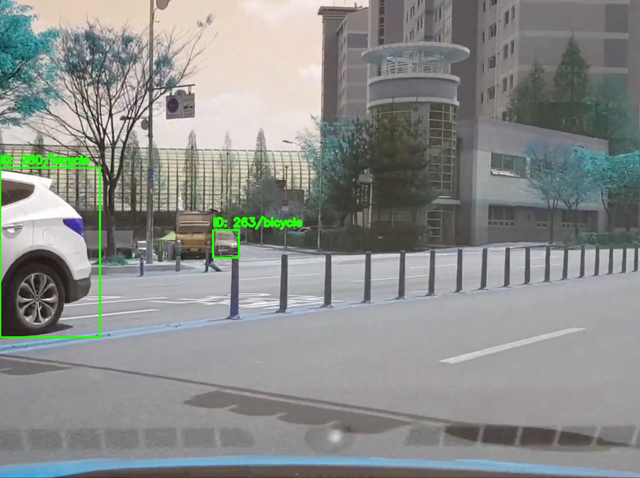

  0%|          | 0/100 [00:00<?, ?it/s]

/var/folders/tw/3zfrjsj13xg3kmttggh_xp080000gn/T/ipykernel_47539/951662451.py:23: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_show.thumbnail((640, 640), Image.ANTIALIAS)


In [72]:
disp = display.display(None, display_id=True)

for i, path in tqdm(enumerate(test_paths), total=len(test_paths)):
    frame = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    
    # verbose=False is set to disable logging results; persist=True is set to persist the trackers if they already exist
    results = model.track(frame, persist=True, imgsz=IMGSZ, verbose=False) 
    
    # show bbox data on frame
    for box in results[0].boxes.data:
        box = box.cpu()
        bbox = box[:4].numpy().astype(np.int32)
        track_id, conf, cls_id = int(box[4].item()), box[5].item(), int(box[6].item())
        cls = id2label[cls_id]
        
        # draw text and bbox on frame
        text = f"ID: {track_id}/{cls}"
        frame = cv2.rectangle(frame, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (36, 255, 12), 3)
        cv2.putText(frame, text, (bbox[0], bbox[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 6)
        
    # resize for faster rendering
    img_show = Image.fromarray(frame)
    img_show.thumbnail((640, 640), Image.ANTIALIAS)
    # update shown image
    disp.update(img_show)

In [ ]:
# A class for storing and manipulating detection boxes.

#    Args:
#        boxes (torch.Tensor | numpy.ndarray): A tensor or numpy array containing the detection boxes,
#            with shape (num_boxes, 6) or (num_boxes, 7). The last two columns contain confidence and class values.
#            If present, the third last column contains track IDs.
#        orig_shape (tuple): Original image size, in the format (height, width).

#    Attributes:
#        xyxy (torch.Tensor | numpy.ndarray): The boxes in xyxy format.
#        conf (torch.Tensor | numpy.ndarray): The confidence values of the boxes.
#        cls (torch.Tensor | numpy.ndarray): The class values of the boxes.
#        id (torch.Tensor | numpy.ndarray): The track IDs of the boxes (if available).
#        xywh (torch.Tensor | numpy.ndarray): The boxes in xywh format.
#        xyxyn (torch.Tensor | numpy.ndarray): The boxes in xyxy format normalized by original image size.
#        xywhn (torch.Tensor | numpy.ndarray): The boxes in xywh format normalized by original image size.
#        data (torch.Tensor): The raw bboxes tensor (alias for `boxes`).

In [ ]:
    """
    A class for storing and manipulating inference results.

    Args:
        orig_img (numpy.ndarray): The original image as a numpy array.
        path (str): The path to the image file.
        names (dict): A dictionary of class names.
        boxes (torch.tensor, optional): A 2D tensor of bounding box coordinates for each detection.
        masks (torch.tensor, optional): A 3D tensor of detection masks, where each mask is a binary image.
        probs (torch.tensor, optional): A 1D tensor of probabilities of each class for classification task.
        keypoints (List[List[float]], optional): A list of detected keypoints for each object.

    Attributes:
        orig_img (numpy.ndarray): The original image as a numpy array.
        orig_shape (tuple): The original image shape in (height, width) format.
        boxes (Boxes, optional): A Boxes object containing the detection bounding boxes.
        masks (Masks, optional): A Masks object containing the detection masks.
        probs (Probs, optional): A Probs object containing probabilities of each class for classification task.
        keypoints (Keypoints, optional): A Keypoints object containing detected keypoints for each object.
        speed (dict): A dictionary of preprocess, inference, and postprocess speeds in milliseconds per image.
        names (dict): A dictionary of class names.
        path (str): The path to the image file.
        _keys (tuple): A tuple of attribute names for non-empty attributes.
    """

In [ ]:
# boxes.data: 각 객체에 대한 상세 정보가 있는 텐서
#    행은 감지된 개별 객체를 나타내며, 
#    열은 다음과 같은 정보를 포함합니다: # (0)xmin, (1)ymin, (2)xmax, (3)ymax, (4)track_id, (5)confidence score, (6)cls_id

In [69]:
tracks = {}
for i, path in tqdm(enumerate(test_paths), total=len(test_paths)):
    frame = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    results = model.track(frame, persist=True, imgsz=IMGSZ, verbose=False)
    
    # add predicted tracked boxes to tracks
    for box in results[0].boxes.data:
        box = box.cpu()
        print(box)
        bbox = box[:4].numpy().astype(np.int32)
        size = (bbox[2] - bbox[0]) * (bbox[3] - bbox[1])              # (xmax - xmin) * (ymax - ymin)
        track_id, cls_id = int(box[4].item()), int(box[6].item())
        
        tracked_box = {'track_id': track_id, 'frame_i': i, 'cls_id': cls_id, 'bbox': bbox, 'size': size}
        tracks[track_id] = tracks.get(track_id, []) + [tracked_box]

        # xmin, ymin, xmax, ymax, track_id, confidence score, cls_id

  0%|          | 0/100 [00:00<?, ?it/s]

tensor([106.5924, 490.2176, 192.8559, 688.1336, 234.0000,   0.8727,   0.0000])
tensor([593.1358, 483.5793, 732.5916, 787.5271, 235.0000,   0.8234,   0.0000])
tensor([4.5976e+02, 4.6624e+02, 5.7974e+02, 8.0243e+02, 2.3600e+02, 7.9381e-01, 0.0000e+00])
tensor([1.3641e+03, 5.0713e+02, 1.5574e+03, 6.9144e+02, 2.3700e+02, 7.7391e-01, 2.0000e+00])
tensor([1.7984e+02, 5.2477e+02, 2.2608e+02, 6.8327e+02, 2.3800e+02, 6.5098e-01, 0.0000e+00])
tensor([ 99.4608, 495.5586, 186.1702, 688.8726, 234.0000,   0.8442,   0.0000])
tensor([619.2932, 474.6333, 735.3038, 790.4913, 235.0000,   0.8607,   0.0000])
tensor([4.7292e+02, 4.6422e+02, 5.9263e+02, 8.0092e+02, 2.3600e+02, 7.7204e-01, 0.0000e+00])
tensor([1.3654e+03, 5.1270e+02, 1.5578e+03, 6.9303e+02, 2.3700e+02, 7.8123e-01, 2.0000e+00])
tensor([1.7326e+02, 5.2280e+02, 2.2314e+02, 6.8432e+02, 2.3800e+02, 6.2671e-01, 0.0000e+00])
tensor([ 98.4806, 495.7069, 178.1994, 686.6246, 234.0000,   0.8863,   0.0000])
tensor([644.6921, 483.3511, 760.0077, 794.8472,

In [70]:
tracks

{234: [{'track_id': 234,
   'frame_i': 0,
   'cls_id': 0,
   'bbox': array([106, 490, 192, 688], dtype=int32),
   'size': 17028},
  {'track_id': 234,
   'frame_i': 1,
   'cls_id': 0,
   'bbox': array([ 99, 495, 186, 688], dtype=int32),
   'size': 16791},
  {'track_id': 234,
   'frame_i': 2,
   'cls_id': 0,
   'bbox': array([ 98, 495, 178, 686], dtype=int32),
   'size': 15280},
  {'track_id': 234,
   'frame_i': 3,
   'cls_id': 0,
   'bbox': array([ 99, 495, 172, 684], dtype=int32),
   'size': 13797},
  {'track_id': 234,
   'frame_i': 4,
   'cls_id': 0,
   'bbox': array([ 95, 498, 164, 684], dtype=int32),
   'size': 12834},
  {'track_id': 234,
   'frame_i': 5,
   'cls_id': 0,
   'bbox': array([ 86, 499, 155, 683], dtype=int32),
   'size': 12696},
  {'track_id': 234,
   'frame_i': 6,
   'cls_id': 0,
   'bbox': array([ 65, 499, 148, 683], dtype=int32),
   'size': 15272},
  {'track_id': 234,
   'frame_i': 7,
   'cls_id': 0,
   'bbox': array([ 59, 502, 141, 681], dtype=int32),
   'size': 146

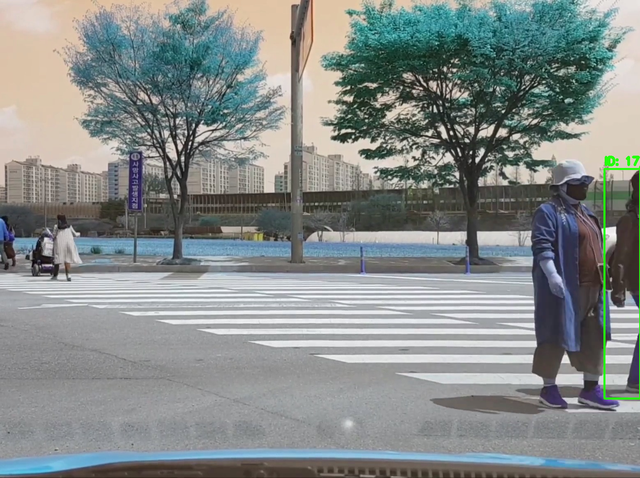

/var/folders/tw/3zfrjsj13xg3kmttggh_xp080000gn/T/ipykernel_47149/284271114.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_show.thumbnail((640, 640), Image.ANTIALIAS)


In [19]:
track = list(tracks.values())[1]
disp = display.display(None, display_id=True)

for tracked_box in track:
    frame = cv2.cvtColor(cv2.imread(test_paths[tracked_box["frame_i"]]), cv2.COLOR_BGR2RGB)
    
    bbox, track_id, cls_id = tracked_box["bbox"], tracked_box["track_id"], tracked_box["cls_id"]
    cls = id2label[cls_id]
    
    # draw text and bbox on frame
    text = f"ID: {track_id}/{cls}"
    frame = cv2.rectangle(frame, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (36, 255, 12), 3)
    cv2.putText(frame, text, (bbox[0], bbox[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 6)
    
    # resize for faster rendering
    img_show = Image.fromarray(frame)
    img_show.thumbnail((640, 640), Image.ANTIALIAS)
    # update shown image
    disp.update(img_show)

In [ ]:
import cv2
import os
from operator import itemgetter

input_path = '/Users/juhyeon/python-workspace/ROADs/frame_img'
output_path = '/Users/juhyeon/python-workspace/ROADs/output_frames'

image_paths = sorted([os.path.join(image_folder_path, file) for file in os.listdir(image_folder_path) if file.endswith('.jpg')])

tracks = {}
previous_frame_track_ids = set()     # 이전의 frame들에서 검출된 track_id 들을 모두 저장!

for i, image_path in enumerate(image_paths):
    frame = cv2.imread(image_path)
    results = model.track(frame, persist=True, imgsz=IMGSZ, verbose=False)
    
    current_frame_track_ids = {int(box[4].item()) for box in results[0].boxes.data}
    # 이전에 검출되지 않았던 track_id 찾기
    disappeared_track_ids = previous_frame_track_ids - current_frame_track_ids
    
    # 이미지 저장 조건: 해당 track_id가 더 이상 검출되지 않았을 때
    for disappeared_track_id in disappeared_track_ids:
        if disappeared_track_id in tracks:
            # 현재까지의 정보 중 bbox 크기가 가장 큰 프레임 저장
            largest_bbox_frame = max(tracks[disappeared_track_id], key=lambda x: x["bbox_size"])["frame_i"]
            output_path = os.path.join(output_folder_path, f'frame_{largest_bbox_frame}_track_{disappeared_track_id}.jpg')
            
            # 이미지 저장
            cv2.imwrite(output_path, frame)
            print(f'Saved: {output_path}')
            
            # 해당 track_id 삭제
            del tracks[disappeared_track_id]
    
    # 현재 프레임에서 검출된 track_id에 대한 정보 업데이트
    for box in results[0].boxes.data:
        box = box.cpu()
        bbox = box[:4].numpy().astype(int)
        track_id, cls_id = int(box[4].item()), int(box[6].item())
        
        if track_id not in tracks:
            tracks[track_id] = []
        
        # 현재 프레임 정보 저장
        tracks[track_id].append({"frame_i": i, "cls_id": cls_id, "bbox": bbox, "bbox_size": (bbox[2] - bbox[0]) * (bbox[3] - bbox[1])})
    
    # 현재 프레임의 track_id 저장
    previous_frame_track_ids = current_frame_track_ids

# 저장할 data 추출

In [1]:
!pip3 install psycopg2

In [2]:
!pip3 install geopy

# PostgreSQL DB

In [12]:
import psycopg2
from geopy.geocoders import Nominatim
from decimal import Decimal
from datetime import datetime


# 1. PostgreSQL 데이터베이스 연결
db_params = {'dbname': 'test',
             'user': 'postgres',
             'password': 'postgres',
             'host': 'localhost',
             'port': '5432'
            }

conn = psycopg2.connect(**db_params)
cursor = conn.cursor()


# 2. 현재 pc가 위치한 gps좌표 수집
response = requests.get('https://ipinfo.io')
data = response.json()

location = data.get('loc')
if location:
    lat, long = location.split(',')
else:
    print("위치 정보를 가져올 수 없습니다.")

    
# 3. 현재 날짜시간정보 수집
current_datetime = datetime.now()


# 4. 'gps_data' 테이블에 위에서 얻어낸 데이터들을 삽입
query = 'INSERT INTO gps_data (latitude, longitude, datetime) VALUES (%s, %s, %s)'
values = (latitude, longitude, current_datetime)


cursor.execute(query, values)
conn.commit()

cursor.close()
conn.close()

# aws S3

In [16]:
!pip3 install boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 6.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: botocore
    Found existing installation: botocore 1.29.76
    Uninstalling botocore-1.29.76:
      Successfully uninstalled botocore-1.29.76
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.5.0 requires botocore<1.29.77,>=1.29.76, but you have botocore 1.34.23 which is incompatible.


In [29]:
s3 = s3_connection()

s3 bucket connected!


In [30]:
import os
import boto3

# AWS 계정 정보
aws_access_key_id = 
aws_secret_access_key = 
aws_region = 
bucket_name = 


# 업로드할 이미지 (/ROADs/test_img/ 하위에 캡쳐된 이미지가 저장되어 있음 )
local_image_directory = '/Users/juhyeon/python-workspace/ROADs/test_img/'
image_files = [f for f in os.listdir(local_image_directory) if f.endswith('.jpg')]


# AWS S3 클라이언트 생성
s3_client = boto3.client('s3', 
                         aws_access_key_id=aws_access_key_id,
                         aws_secret_access_key=aws_secret_access_key, 
                         region_name=aws_region)


# 각 이미지를 S3로 업로드 (파일이름은 똑같이 저장)
for image_file in image_files:
    local_image_path = os.path.join(local_image_directory, image_file)
    s3_object_key = f'finalprojectimage/{image_file}'

    # 이미지 업로드
    s3_client.upload_file(local_image_path, bucket_name, s3_object_key)

    print(f"Image uploaded to S3: {s3_object_key}")

Image uploaded to S3: finalprojectimage/test_img_1.jpg
Image uploaded to S3: finalprojectimage/test_img_2.jpg
Image uploaded to S3: finalprojectimage/test_img_3.jpg
